In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from LinPhaseFilterDesign import *

FILTER DESIGN EXPERIMENTS

In [2]:
#Experiment 1 : Linear Phase Bandstop Filter Design
pass1=np.linspace(0,0.3*np.pi,round(0.3*np.pi/(0.01*np.pi)+1))
pass2=np.linspace(0.85*np.pi,np.pi,round(np.pi*0.15/(0.01*np.pi))+1)
stop1=np.linspace(0.5*np.pi,0.7*np.pi,round(0.2*np.pi/(0.01*np.pi))+1)
w1=np.concatenate((pass1, stop1, pass2))
desired_freq1=np.concatenate((np.ones(len(pass1)),db2mag(-90)*np.ones(len(stop1)), np.ones(len(pass2))))

C:\Users\MONSTER\anaconda3\envs\neural_seperation\lib\site-packages\cvxpy\problems\problem.py:1125: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Problem status: optimal_inaccurate


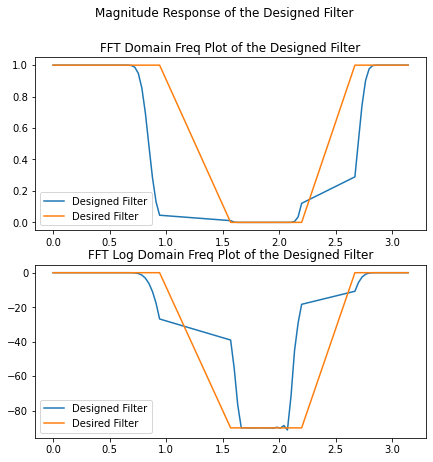

Length of the filter is  81


In [3]:
F=LinPhaseFilterDesign(N=40,norm=1)
filter1=F.lin_phase_design(w1,desired_freq1)
F.plot_mag()
print('Length of the filter is ', filter1.shape[0])

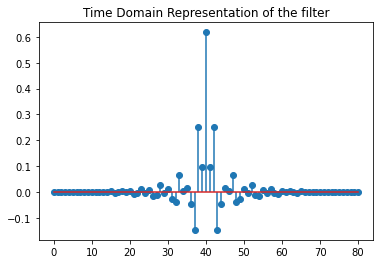

In [4]:
plt.stem(filter1)
plt.title('Time Domain Representation of the filter')
plt.show()

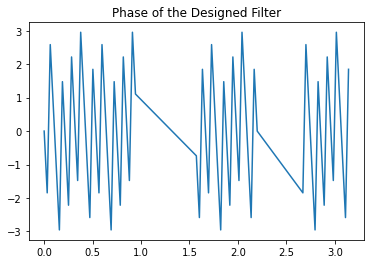

In [5]:
fft_points=2*desired_freq1.shape[0]
H=np.fft.fft(filter1,fft_points)
phase=np.angle(H)
plt.plot(w1,phase[0:int(fft_points/2)])
plt.title('Phase of the Designed Filter')
plt.show()

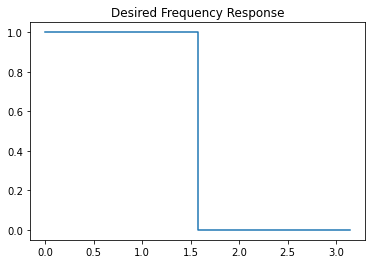

In [6]:
#Experiment 2 : Linear Phase LowPass Filter Design
passband=np.linspace(0,0.5*np.pi,round(0.5*np.pi/(0.01*np.pi)+1))
stopband=np.linspace(0.5*np.pi,np.pi,round(0.5*np.pi/(0.01*np.pi)+1))
w2=np.concatenate((passband,stopband))
desired_freq2=np.concatenate((np.ones(len(passband)),db2mag(-100)*np.ones(len(stopband))))
plt.plot(w2,desired_freq2)
plt.title('Desired Frequency Response')
plt.show()

Problem status: optimal


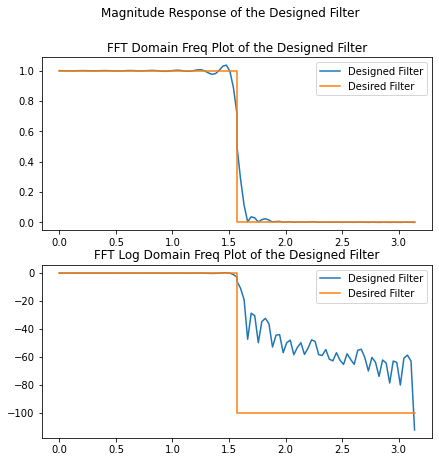

In [7]:
F=LinPhaseFilterDesign(N=30,norm=1)
lp_filter=F.lin_phase_design(w2,desired_freq2)
F.plot_mag()

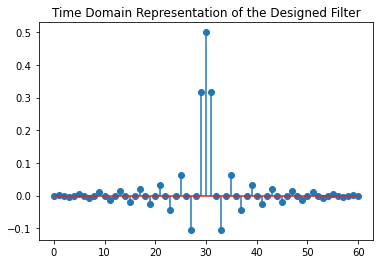

In [8]:
plt.stem(lp_filter)
plt.title('Time Domain Representation of the Designed Filter')
plt.show()

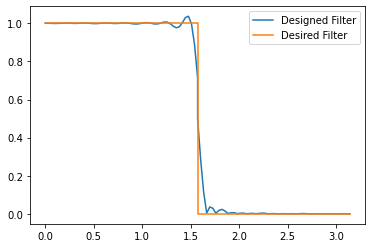

In [9]:
ff=2*w2.shape[0]
H=np.fft.fft(lp_filter,ff)
plt.plot(w2,np.absolute(H[0:int(ff/2)]),label='Designed Filter')
plt.plot(w2,desired_freq2,label='Desired Filter')
plt.legend()
plt.show()

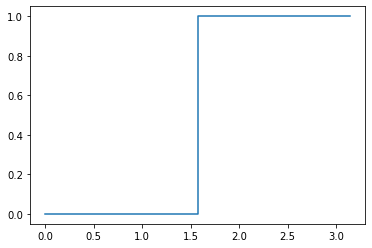

In [10]:
#Experiment 3 : Linear Phase HighPass Filter Design
passband=np.linspace(0,0.5*np.pi,round(0.5*np.pi/(0.01*np.pi)+1))
stopband=np.linspace(0.5*np.pi,np.pi,round(0.5*np.pi/(0.01*np.pi)+1))
w3=np.concatenate((passband,stopband))
desired_freq3=np.concatenate((db2mag(-100)*np.ones(len(passband)),np.ones(len(stopband))))
plt.plot(w3,desired_freq3)
plt.show()

Problem status: optimal


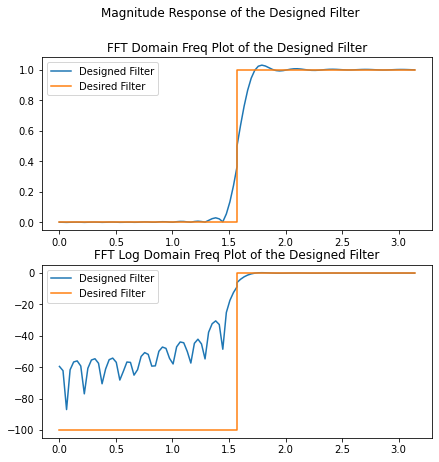

Length of the designed filter is  41


In [11]:
F=LinPhaseFilterDesign(N=20,norm='inf')
hp_filter=F.lin_phase_design(w3,desired_freq3)
F.plot_mag()
print("Length of the designed filter is ", hp_filter.shape[0])

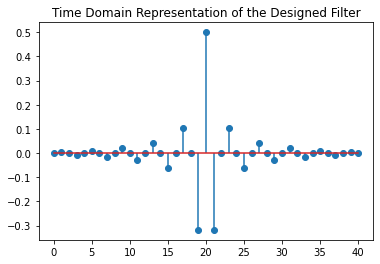

In [12]:
plt.stem(hp_filter)
plt.title('Time Domain Representation of the Designed Filter')
plt.show()

# APPLY FILTER TO A SIGNAL

LOW-PASS FILTERING

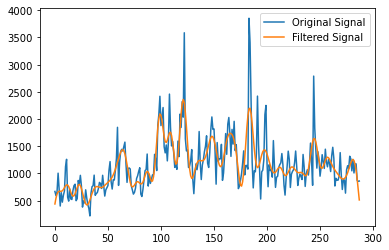

In [13]:
# Toy signal example from https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
signal = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])

passband=np.linspace(0,0.2*np.pi,round(0.2*np.pi/(0.01*np.pi)+1))
stopband=np.linspace(0.2*np.pi,np.pi,round(0.8*np.pi/(0.01*np.pi)+1))
w2=np.concatenate((passband,stopband))
desired_freq2=np.concatenate((np.ones(len(passband)),db2mag(-100)*np.ones(len(stopband))))

F=LinPhaseFilterDesign(N=30,norm=1)
lp_filter=F.lin_phase_design(w2,desired_freq2,verbose=False)

filtered_signal = F.apply_filter(signal, mode = 'same')

plt.plot(signal, label = 'Original Signal')
plt.plot(filtered_signal, label = 'Filtered Signal')
plt.legend()
plt.show()

HIGH-PASS FILTERING

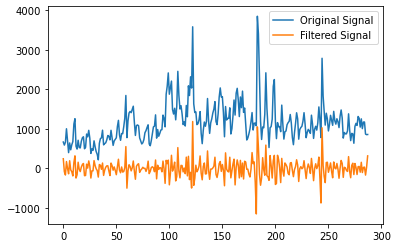

In [14]:
# Toy signal example from https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
signal = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])

passband=np.linspace(0,0.3*np.pi,round(0.3*np.pi/(0.01*np.pi)+1))
stopband=np.linspace(0.3*np.pi,np.pi,round(0.7*np.pi/(0.01*np.pi)+1))
w3=np.concatenate((passband,stopband))
desired_freq3=np.concatenate((db2mag(-100)*np.ones(len(passband)),np.ones(len(stopband))))

F=LinPhaseFilterDesign(N=30,norm=1)
lp_filter=F.lin_phase_design(w3,desired_freq3,verbose=False)

filtered_signal = F.apply_filter(signal, mode = 'same')

plt.plot(signal, label = 'Original Signal')
plt.plot(filtered_signal, label = 'Filtered Signal')
plt.legend()
plt.show()